In [5]:
from sklearn.datasets import load_iris
from tensorflow.keras.layers import Dense
from  tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [6]:
iris = load_iris()
x = iris.data
y  = iris.target

In [8]:
scaller = StandardScaler()
X = scaller.fit_transform(x)

In [10]:
ohe = OneHotEncoder()

In [14]:
y = y.reshape(-1,1)

In [15]:
ohe = ohe.fit_transform(y)

In [16]:
y = ohe.toarray()

In [43]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

### DeepLearning

In [44]:
model = Sequential()

In [45]:
model.add(Dense (12, activation="relu", input_shape=(4, )))

In [46]:
model.add(Dense (32, activation="relu"))

In [47]:
##outputlayer

model.add(Dense(3, activation= "softmax"))

In [56]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [82]:
H =  model.fit(trainX, trainY, validation_split = 0.3, epochs=20, batch_size=len(x))

Epoch 1/20
1/1 [==============================] - 0s 36ms/step - loss: 1.1875 - accuracy: 0.3571 - val_loss: 1.2354 - val_accuracy: 0.3056
Epoch 2/20
1/1 [==============================] - 0s 13ms/step - loss: 1.1761 - accuracy: 0.3571 - val_loss: 1.2212 - val_accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 0s 14ms/step - loss: 1.1647 - accuracy: 0.3571 - val_loss: 1.2069 - val_accuracy: 0.3889
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 1.1531 - accuracy: 0.3571 - val_loss: 1.1928 - val_accuracy: 0.4167
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 1.1412 - accuracy: 0.4167 - val_loss: 1.1788 - val_accuracy: 0.4444
Epoch 6/20
1/1 [==============================] - 0s 14ms/step - loss: 1.1290 - accuracy: 0.5000 - val_loss: 1.1648 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 14ms/step - loss: 1.1167 - accuracy: 0.5476 - val_loss: 1.1511 - val_accuracy: 0.5556
Epoch 8/20
1/1 [===========

In [83]:
loss = H.history["loss"]
val_loss = H.history["val_loss"]
accuracy = H.history["accuracy"]
val_accuracy = H.history["val_accuracy"]

<AxesSubplot:>

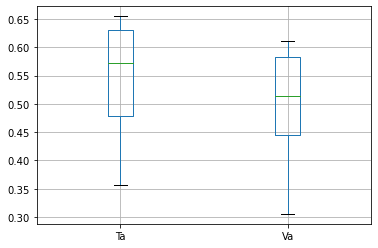

In [84]:
import pandas as pd

tva = pd.DataFrame({
    "Ta":accuracy,
    "Va":val_accuracy
})

tva.boxplot()

In [85]:
val_accuracy

[0.3055555522441864,
 0.3333333432674408,
 0.3888888955116272,
 0.4166666567325592,
 0.4444444477558136,
 0.5,
 0.5555555820465088,
 0.6111111044883728,
 0.6111111044883728,
 0.6111111044883728,
 0.5833333134651184,
 0.5833333134651184,
 0.5833333134651184,
 0.5555555820465088,
 0.5277777910232544,
 0.5277777910232544,
 0.5,
 0.5,
 0.4444444477558136,
 0.4444444477558136]

In [86]:
model.predict_classes(testX[1:2])

array([1], dtype=int64)

In [92]:
model.predict(testX)

array([[0.24581441, 0.29926813, 0.45491752],
       [0.29406694, 0.41102386, 0.29490924],
       [0.29282597, 0.41118425, 0.2959897 ],
       [0.25992557, 0.28170648, 0.45836794],
       [0.21428615, 0.26756406, 0.5181498 ],
       [0.27298048, 0.32593724, 0.40108225],
       [0.24779794, 0.29040536, 0.4617967 ],
       [0.29417992, 0.39952525, 0.30629477],
       [0.24453263, 0.2855644 , 0.46990302],
       [0.22914046, 0.2876462 , 0.48321342],
       [0.2554983 , 0.35847723, 0.38602442],
       [0.2536085 , 0.368463  , 0.37792853],
       [0.2932219 , 0.38510013, 0.32167798],
       [0.26338372, 0.33060747, 0.4060088 ],
       [0.26260704, 0.33761537, 0.39977756],
       [0.27938235, 0.3285165 , 0.39210117],
       [0.27158427, 0.27853444, 0.44988135],
       [0.29158098, 0.4175841 , 0.2908349 ],
       [0.28687492, 0.42181635, 0.29130876],
       [0.27734798, 0.36315548, 0.3594965 ],
       [0.28812388, 0.40763062, 0.30424553],
       [0.20503592, 0.26079798, 0.5341661 ],
       [0.

In [87]:
loss, acc = model.evaluate(testX, testY, verbose=False)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
newY= []
for i in testY:
    newY.append(list(i).index(1))

newY

[2,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0]

In [90]:
newY = np.array(newY)

In [91]:
newY

array([2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2,
       0, 2, 0, 1, 1, 2, 0, 0])